**Recommendation Spotify song**

**Import Libraries**

n_init: 1 | max_iter: 2 | alg: full | inertia: 85600.12687395677
n_init: 1 | max_iter: 2 | alg: elkan | inertia: 85600.12687395677
n_init: 1 | max_iter: 300 | alg: full | inertia: 79083.66559576345
n_init: 1 | max_iter: 300 | alg: elkan | inertia: 79083.66559576344
n_init: 5 | max_iter: 2 | alg: full | inertia: 83689.09404786972
n_init: 5 | max_iter: 2 | alg: elkan | inertia: 83689.09404786972
n_init: 5 | max_iter: 300 | alg: full | inertia: 79082.6654724546
n_init: 5 | max_iter: 300 | alg: elkan | inertia: 79082.6654724546
n_init: 100 | max_iter: 2 | alg: full | inertia: 80305.5682773627
n_init: 100 | max_iter: 2 | alg: elkan | inertia: 80305.5682773627
n_init: 100 | max_iter: 300 | alg: full | inertia: 77559.01135806719
n_init: 100 | max_iter: 300 | alg: elkan | inertia: 77559.01135806719
[0.20233780268313126, 0.11948618416497545, 0.12005735413362852, 0.12331458233515559, 0.12692450769551952, 0.13033679814677016, 0.134590501214615, 0.12269780730695855, 0.11781941840198787, 0.12939230

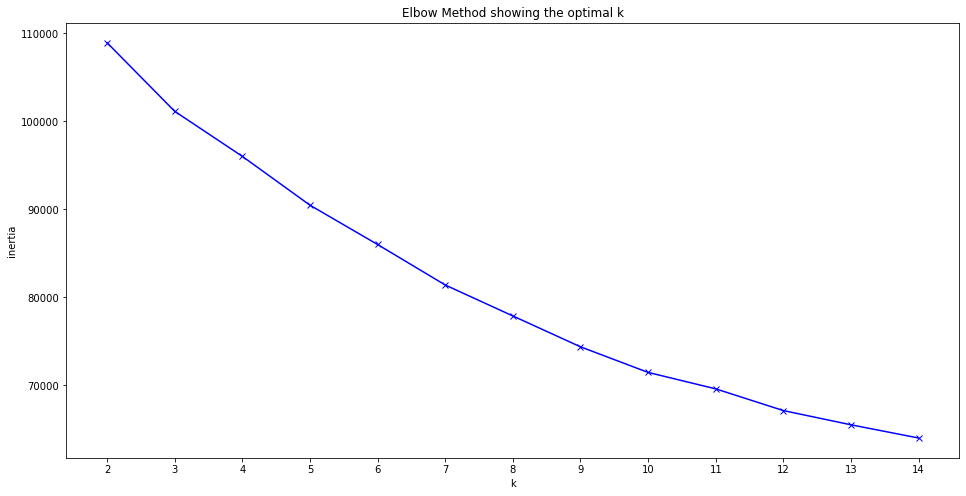

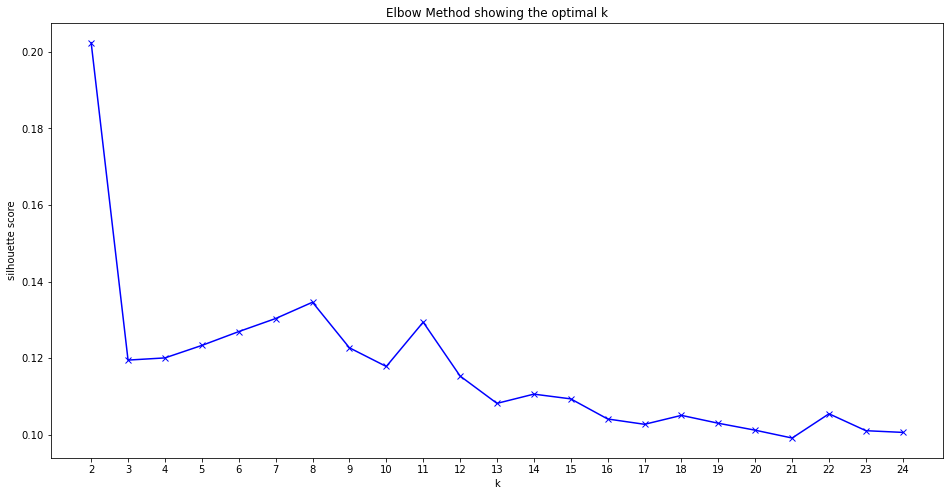

In [2]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
import re
import random
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import clustering_sp as cl

In [3]:
cl.df_playlist

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster,id,uri
0,0.09400,0.310,152560.0,0.445,0.067800,7.0,0.1130,-13.355,0.0,0.0863,95.360,3.0,0.122,2.0,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs
1,0.13700,0.419,197707.0,0.565,0.337000,5.0,0.1280,-11.565,1.0,0.0347,151.277,4.0,0.648,1.0,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy
2,0.59000,0.354,244285.0,0.302,0.070900,9.0,0.1110,-13.078,1.0,0.0326,123.753,4.0,0.223,2.0,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm
3,0.32500,0.727,249940.0,0.785,0.126000,5.0,0.3100,-6.707,0.0,0.0603,129.649,4.0,0.960,6.0,7J9mBHG4J2eIfDAv5BehKA,spotify:track:7J9mBHG4J2eIfDAv5BehKA
4,0.02310,0.571,278320.0,0.724,0.003110,0.0,0.0919,-5.967,1.0,0.0260,116.755,4.0,0.385,10.0,1VZedwJj1gyi88WFRhfThb,spotify:track:1VZedwJj1gyi88WFRhfThb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.12300,0.651,200480.0,0.801,0.000000,0.0,0.0825,-7.340,1.0,0.0513,133.763,4.0,0.776,4.0,5jzma6gCzYtKB1DbEwFZKH,spotify:track:5jzma6gCzYtKB1DbEwFZKH
9915,0.08230,0.811,191560.0,0.647,0.681000,0.0,0.0572,-10.989,1.0,0.0498,139.787,4.0,0.990,9.0,2fmMPJb5EzZCx8BcNJvVk4,spotify:track:2fmMPJb5EzZCx8BcNJvVk4
9916,0.19000,0.686,206293.0,0.610,0.000931,7.0,0.0710,-5.902,1.0,0.0262,80.567,4.0,0.766,9.0,60rIdEPDrzyLiLC0icp3xz,spotify:track:60rIdEPDrzyLiLC0icp3xz
9917,0.00824,0.711,200293.0,0.718,0.002080,6.0,0.0732,-5.739,1.0,0.0380,117.071,4.0,0.688,3.0,0sEm1ld0V8YTCPcjPVfIsc,spotify:track:0sEm1ld0V8YTCPcjPVfIsc


In [4]:
#Initialize SpotiPy with user credentias
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id='adc8c57bacb34edb9a01487d2673caa5',
    client_secret='ec369918d3fb4a06877cc071ee44eceb'))

In [5]:
url = 'https://www.billboard.com/charts/hot-100'

In [6]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [7]:
title_song_l = 'span.chart-element__information__song.text--truncate.color--primary'
artist_l = 'span.chart-element__information__artist.text--truncate.color--secondary'
ranking_l = 'span.chart-element__rank.flex--column.flex--xy-center.flex--no-shrink > span.chart-element__rank__number'
last_week_l = '.chart-element__meta.text--center.color--secondary.text--last'
peak_l = '.chart-element__meta.text--center.color--secondary.text--peak'
wks_chart_l = '.chart-element__meta.text--center.color--secondary.text--week'

title_song_df = []
artist_df=[]
ranking_df = []
last_tweek_df=[]
peak_df = []
wks_chart_df = []

In [8]:
def getting_text(link, array):
    for title in soup.select(link):
        array.append(title.get_text())
    return array


In [9]:
title_song = getting_text(title_song_l,title_song_df)
artist = getting_text(artist_l,artist_df)
ranking = getting_text(ranking_l,ranking_df)
last_week = getting_text(last_week_l,last_tweek_df)
peak = getting_text(peak_l,peak_df)
wks_chart = getting_text(wks_chart_l,wks_chart_df)
len(wks_chart)

100

**Creation DF from scrapping Billboard web in 100 Hot songs**

In [10]:
billboard_df = pd.DataFrame({'Ranking': ranking,
                            'Title': title_song,
                            'Artists': artist,
                            'Last week': last_week,
                            'Peak': peak,
                            'Weeks on Chart': wks_chart})

billboard_df['Title'] = billboard_df['Title'].str.upper()
billboard_df['Artists'] = billboard_df['Artists'].str.upper()
billboard_df

,Ranking,Title,Artists,Last week,Peak,Weeks on Chart
0,1,POSITIONS,ARIANA GRANDE,-,1,1
1,2,FOREVER AFTER ALL,LUKE COMBS,-,2,1
2,3,MOOD,24KGOLDN FEATURING IANN DIOR,1,1,12
3,4,LAUGH NOW CRY LATER,DRAKE FEATURING LIL DURK,3,2,11
4,5,BLINDING LIGHTS,THE WEEKND,4,1,48
...,...,...,...,...,...,...
95,96,CARDIGAN,TAYLOR SWIFT,88,1,14
96,97,FORGET ME TOO,MACHINE GUN KELLY & HALSEY,-,44,3
97,98,LA TOXICA,FARRUKO,-,98,1
98,99,HEAD & HEART,JOEL CORRY X MNEK,-,99,1


**Funciones de la interfaz del usuario**

In [11]:
def ask_category(): #Player choose the song thanks to dataframe   
    print("\nLet's start with Recommendation Song!\n")
    player_song_desired = input(str("\nWhat is your favourite song? \n")).upper()
    while True:
        try:
            if player_song_desired in list(billboard_df['Title']):
                recomendation = get_recommend(player_song_desired)
                return recomendation
                break
            else:
                player_artist_desired = input(str("\n Nowdays your song is not in the 100 hot songs!\n Then, could you tell me what is the artist of the song? ")).upper()
                uri = not_hot_list_uri(player_song_desired,player_artist_desired)
                features = get_audio_features(uri)
                cluster = get_scalar_predict(features)
                song_recommended = recommendation_song_according_cluster(cluster, uri)
                artist_recommended = recommendation_artist_according_cluster(song_recommended)
                recommended = "\n|| Name song: "+song_recommended + " - Artist: " + artist_recommended+ " ||"
                return recommended
                break
                
        except ValueError:
            print("\nUps... make sure to write a string! Please, write the topic again.")
            


In [12]:
def recommendation_song_according_cluster(cluster, uri):
    uris_cluster_owns_song = cl.df_playlist[cl.df_playlist['cluster'] == int(cluster[0])]['uri']
    uri_random = random.sample(list(uris_cluster_owns_song), k=1)
    song_recommended = spotify.track(uri_random[0])['album']['name']    
    return song_recommended


In [13]:
def recommendation_artist_according_cluster(song_recommended):
    artist_recommended = spotify.search(q= [song_recommended], limit= 1)
    return artist_recommended['tracks']['items'][0]['artists'][0]['name']

In [14]:
def get_audio_features(uri):
    features = spotify.audio_features(uri)
    return features


In [15]:
def get_scalar_predict(features):
    features = pd.DataFrame(features)
    audio_df = features.loc[:,['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]
    audio_df_scaled = cl.scaler.transform(audio_df)
    cluster = cl.kmeans.predict(audio_df_scaled)
    return cluster

In [16]:
def not_hot_list_uri(player_song_desired, player_artist_desired):
    global track_id

    if player_song_desired not in list(billboard_df['Title']):
        try:
            track = spotify.search(q = [player_song_desired, player_artist_desired],  limit = 1)
            track_id = []
            for t in track['tracks']['items']:
                track_id.append(t['uri'])
            return track_id
        except:
            print("There's no song")
            return False
    else:
        print('Ups!')  
    

In [17]:
def get_artist_according_the_song(player_song_desired): 
    index = billboard_df[billboard_df['Title'] == player_song_desired].index.values.tolist()
    artist = billboard_df['Artists'][index].values[0]
    artist = re.sub('THE',"", artist)
    artist = re.sub('FEATURING',"", artist)
    print_artist(artist)
    regex_not_clean = re.findall('\w+\S', artist)   
    return regex_not_clean

In [18]:
def get_recommend(player_song_desired): #according the artist song, we check if there's the same artist with other song different. 
    regex = get_artist_according_the_song(player_song_desired)
    for artist_regex in regex:
        song_artist_recommended = billboard_df[billboard_df['Artists'].str.contains(artist_regex)]
        if len(song_artist_recommended) <= 1: #hay un array de todas las músicas segun el artista que se ha buscado en el primer input del usuario. es decir, HOLY -> Justin Bieber -> HOLY, LONELY(ésta se recomienda)
            print("\nThere are not recommendation according your search. Why don't try listening other song? \n")
            return random.choice(billboard_df['Title'])
        else:
            return song_artist_recommended[song_artist_recommended['Title'] != player_song_desired][['Title','Artists']].to_string(index=False)


In [19]:
def print_artist(regex_name):
    if len(regex_name) >= 1:
        #print(f'\nYour artists song are: {str([i.title() for i in regex_name])[1:-1]}\n')
        print(f'\nYour artists song are: {regex_name.title()}')
    else:
        #print(f'\nYour song artist is: {regex_name[0].value}\n')
        print(f'\nYour artist is : {regex_name.title()}')

In [20]:
def recommend_again_or_not():
    try:
        while True:
            continue_game = input("\nPlay Again? (Y/N) \n").upper()
            if continue_game == 'Y':
                return True
                break
            elif continue_game == 'N':
                return False
                break
    except:
        pass

In [21]:
def main():
    play_on = True
    while play_on:
        recommendation = ask_category()
        print(f'\n All right! Then, our recommendation for you is: \n{str(recommendation).title()}\n')
        play_on = recommend_again_or_not()
    print("\nSee you the next time!")


if __name__ == "__main__":
    main()


Let's start with Recommendation Song!


What is your favourite song? 
Holy

Your artists song are: Justin Bieber  Chance  Rapper

 All right! Then, our recommendation for you is: 
  Title                       Artists
 Lonely  Justin Bieber & Benny Blanco


Play Again? (Y/N) 
Y

Let's start with Recommendation Song!


What is your favourite song? 
Paradise

 Nowdays your song is not in the 100 hot songs!
 Then, could you tell me what is the artist of the song? Coldplay

 All right! Then, our recommendation for you is: 

|| Name Song: X (Deluxe Edition) - Artist: Ed Sheeran ||


Play Again? (Y/N) 
n

See you the next time!
